<h1>Linear Regression</h1>
<p>The goal is, given some data we would like to find a line that best fit that set of data according to a particular criterion.</p>

- [Stanford CS229: Machine Learning - Linear Regression and Gradient Descent | Lecture 2 (Autumn 2018)](https://www.youtube.com/watch?v=4b4MUYve_U8&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=2&t=4183s)
- [Dataset](https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction?resource=download)
---


In [249]:
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import clear_output
import numpy as np

In [250]:
#Util functions
def dotProduct(x, y):
    temp = None
    if(len(x)==len(y)):
        temp = 0
        n = len(x)

        for i in range(n):
            temp+= x[i] * y[i]
    return temp

dotProduct([1,2,3],[1,2,3])

14

I'm going to fit a line through (Power, Price)

In [251]:
#Using cars.csv
cars = pd.read_csv("data/cars.csv")
cars

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [252]:
#Global variables
learning_rate = 0.0000001

price = cars["Price"].to_numpy()
power = cars["Power"].to_numpy()

M = len(price)

print("learning_rate: "+str(learning_rate),"\nM: "+str(M))

learning_rate: 1e-07 
M: 100


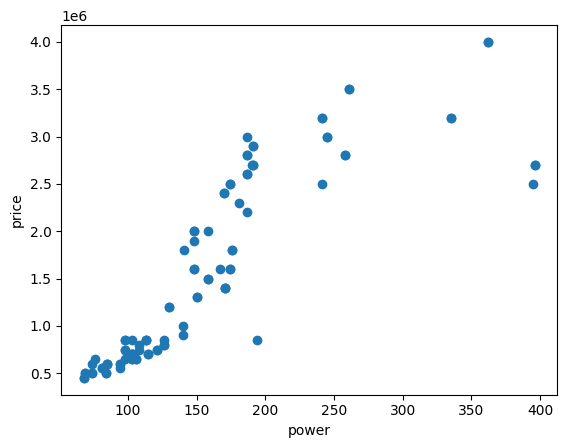

In [253]:
# Graph
plt.ylabel("price")
plt.xlabel("power")
plt.scatter(power, price)

Here we define the ```h(thetas, x)```, the hypothesis and ```fit(thetas, lr, x, y)```, to "fit" the line

As mentioned, the goal is to fit a line.

---

The hypothesis is to imagine a line that already existed with parameters thetas. That's why we take the dot product of thetas and x.

- ```Thetas = [theta0, theta1, theta2, ...]```
- ```x = [1, x1, x2, ...] #Agumented features```

Taking the dot product would produce: theta0 + theta1 * x1 + theta2 * x2 + ...

x is our feature (i.e. ```Power```) and theta is the parameter of the line. For the instance of this notebook, you can imagine that the line is:

$$h(\theta, x) = Price = b + m * Power$$

where b = theta0, and m = theta1 which are set to some values.

To wrap it back to our goal, we need to find b and m or ```theta0, theta1``` in such a way that fits a line "best".

---

An intuitive idea of "best" fit can be something like a line that's as close as possible to all points. Then, how can we measure this closeness? Well, one way to do it is to use Mean Square Error (MSE):

$$L = \frac{1}{2}\sum_{n=1}^{m}(h(\theta, x^{(i)}) - y^{(i)})^{2}$$

This might look like we just pull it out of thin air, but this measure has a pretty good probabilistic interpretation. In a nutshell though, with this error, we assume that there's a line that best fit everyone and each point is disturbed by a gaussian noise. In another word, the point got knocked off our best line randomly.

These set up of fitting data results in Linear Regression

---

The value of the thetas are initially set arbitrarily (I've set them to be 0 here) but how can we update them? An equivalent way of saying fitting a line, now that we know more about Linear Regression, is how can we best minimize the MSE/L (sometimes called the loss function)? 

The loss function is a continuous function which we can also graphed (given a small enough dimension). Given the number of parameters we use, it'd be a 3D graph. What's to be of interest here though, if you actually did plot it out, as in (L, theta0, theta1) you'd see that its a convex plane with a minimum point. Arbitrarily setting the thetas resulted in us being somewhere on this plane. How can we go down?

To answer that, we need to borrow a basic result from Multivariable calculus; The partial derivative of a multivariable function (our case) gives the direction of steepest ascent (and also, the opposite of the steepest ascent is steepest descent). 

One more thing we need is to know that if we have the derivative a function, we can approximate the next point of the function i.e. $x_{2} ≈ x_{1} + \frac{\partial f}{\partial x}*\alpha$. For small enough $\alpha$, we can produce a good approximation

We can take the derivative of L wrt to all of the thetas and if you do the math, you'll get:

$$\displaystyle \frac{\partial L}{\partial \theta_{j}} = \sum_{i = 1}^{m}x^{i}_{j}*(h(\theta, x^{(i)}) - y^{(i)})$$

Getting the opposite direction for this axis (multiple the derivative with -1), you'd get the update rule:

$$ \theta_{j} := \theta_{j} - \alpha*\sum_{i = 1}^{m}x^{i}_{j}*(h(\theta, x^{(i)}) - y^{(i)}) = \theta_{j} + \alpha*\sum_{i = 1}^{m}x^{i}_{j}*(y^{(i)}-h(\theta, x^{(i)}))$$

Then, we'd simply keep updating the theta again and again until we've converged/satisfied. This approach is also known as Gradient Descent

In [254]:
#hypothesis and fitting
def h(thetas, x): 
    return dotProduct(thetas, x)

#Using Gradient Descent
def fit(thetas, lr, x, y):
    for j in range(len(thetas)):
        val = 0
        for i in range(len(x)):
            val+=x[i][j] * (-y[i] + h(thetas,x[i]))
        
        thetas[j] = thetas[j] - lr * val 

    loss = 0
    for i in range(len(x)):
        loss+= (y[i]-h(thetas,x[i]))**2

    return loss/2

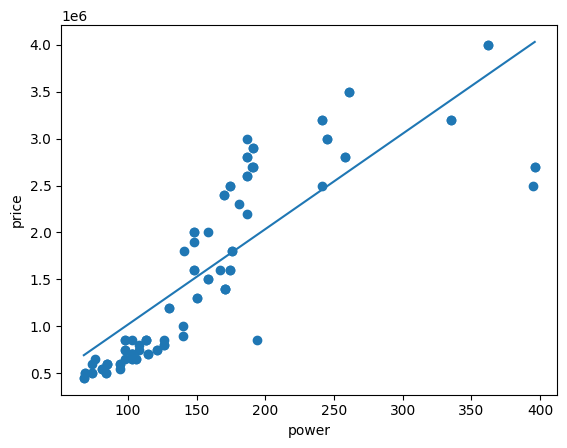

[16.719088665888584, 10177.672163712967] Loss: 13514035791375.225


In [255]:
#Train
powers=[]
for i in range(len(price)):
    powers.append([1, power[i]])

thetas = [
    0,0
]# b & theta1

#For plotting
min_power = [1, min(power)]
max_power = [1, max(power)]

for epoch in range(100):
    clear_output(wait=True)
    plt.close() #Plotting stuff

    val = fit(thetas, learning_rate, powers, price)
    
    # if((epoch+1)%10==0):
    #     print(epoch+1,"\t Loss:",val)

    # Plotting stuff: Just ignore
    plt.ylabel("price")
    plt.xlabel("power")
    plt.scatter(power, price)
    predicted_prices=[h(thetas, min_power), h(thetas, max_power)]
    plt.plot([min_power[1],max_power[1]], predicted_prices)
    plt.show()

print(thetas, "Loss: "+str(val))

Why the humungous loss? Well, its because the values of prices are pretty big

Coefficients: 
 -186379.6059955873 [11132.48343765]
Mean squared error: 263679926012.13


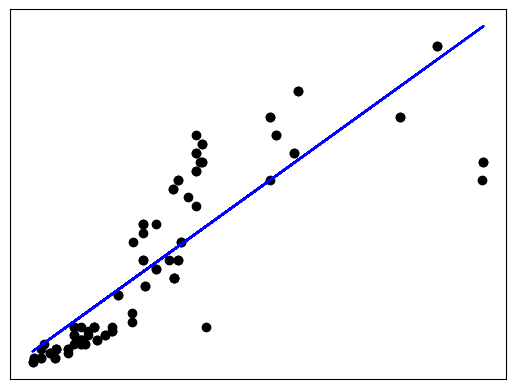

In [256]:
# Checking with scikit
# Code source: Jaques Grobler
# License: BSD 3 clause

import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
# diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
# diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
# diabetes_X_train = diabetes_X[:-20]
# diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
# diabetes_y_train = diabetes_y[:-20]
# diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(power.reshape(-1,1), price)

# Make predictions using the testing set
pred = regr.predict(power.reshape(-1,1))

# The coefficients
print("Coefficients: \n", regr.intercept_ ,regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(price, pred))

# Plot outputs
plt.scatter(power, price, color="black")
plt.plot(power, pred, color="blue")

plt.xticks(())
plt.yticks(())

plt.show()